In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# os.listdir('./face_age')

In [3]:
age_targets = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015',
               '016','017','018','019','020','021','022','023','024','025','026','027','028','029','030',
               '031','032','033','034','035','036','037','038','039','040','041','042','043','044','045',
               '046','047','048','049','050','051','052','053','054','055','056','057','058','059','060',
               '061','062','063','064','065','066','067','068','069','070','071','072','073','074','075',
               '076','077','078','079','080','081','082','083','084','085','086','087','088','089','090',
               '091','092','093','095','096','099','100','101','110']

In [4]:
train_dir = './face_age'
data = []

for age_target in age_targets:
    age_lable = age_targets.index(age_target)
    age_path = os.path.join(train_dir,age_target)
    for img in os.listdir(age_path):
        img_path = os.path.join(age_path,img)
        train_img = plt.imread(img_path)
        try:
            image = cv2.resize(train_img,(150,150))
            np_image = np.array(image)
            data.append([np_image, age_lable])
        except Exception as e:
            pass
    
len(data)

9778

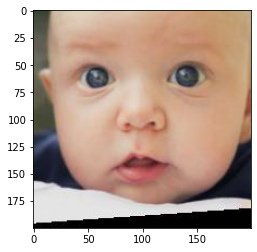

In [5]:
im = plt.imread('./face_age/001/16.png')
plt.imshow(im)

In [6]:
random.shuffle(data)

### train data has been shuffled before here 

In [7]:
features = []
labels =[]

for feature, label in data:
    features.append(feature)
    labels.append(label)

np_features = np.array(features)
np_lables = np.array(labels)

In [8]:
print(np_lables.shape,np_features.shape)

(9778,) (9778, 150, 150, 3)


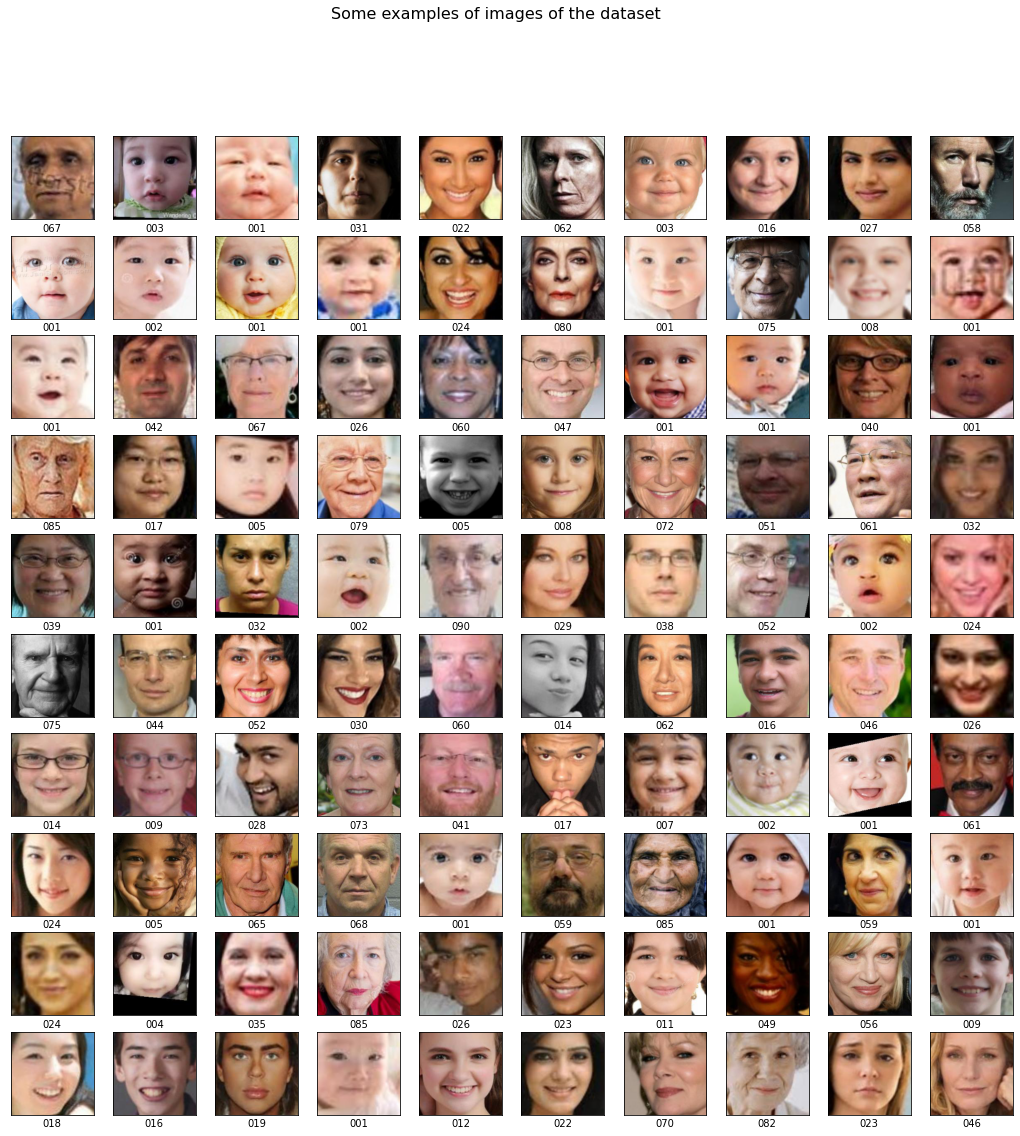

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(18,18))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np_features[i], cmap=plt.cm.binary)
    plt.xlabel(age_targets[np_lables[i]])
plt.show()

In [10]:
np_lables

array([66,  2,  0, ..., 41, 22,  1])

In [13]:
# from sklearn.decomposition import PCA
# pca_90 = PCA(n_components=0.90,svd_solver='full')
# np_hog_features_pca = pca_90.fit_transform(np_features)
# np_hog_features_pca.shape

In [ ]:
plt.plot(np.cumsum(pca_90.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.hlines([0.8], 0, 621, linestyles='dashed', colors='red')
plt.show()

In [16]:
print('total data shape: ',np_features.shape)
print('total labels shape: ', np_lables.shape)

total data shape:  (9778, 150, 150, 3)
total labels shape:  (9778,)


In [17]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

In [18]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

In [19]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

c:\users\richie lee\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
trained = model.fit(np_features,np_lables,epochs=35,validation_split=0.20) 

Epoch 1/35
245/245 [==============================] - 41s 143ms/step - loss: nan - accuracy: 0.1152 - val_loss: nan - val_accuracy: 0.1074
Epoch 2/35
245/245 [==============================] - 33s 137ms/step - loss: nan - accuracy: 0.1153 - val_loss: nan - val_accuracy: 0.1074
Epoch 3/35
245/245 [==============================] - 34s 138ms/step - loss: nan - accuracy: 0.1153 - val_loss: nan - val_accuracy: 0.1074
Epoch 4/35
175/245 [====================>.........] - ETA: 8s - loss: nan - accuracy: 0.1193